### 당뇨병 예측 모델 구현
- 데이터 : scikit-learn dataset
- 피 쳐 : 10
- 타 겟 : 정수값

In [983]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.neighbors import KNeighborsRegressor

In [984]:
df=pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", sep="\t")

In [985]:
df

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [986]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [987]:
df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [988]:
# 상관관계
df.corr(numeric_only=True)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


 - 기계학습 데이터셋 준비 => 피쳐와 타겟 분리

In [989]:
featureDF=df[['BMI','S5']]
featureDF.head()

,BMI,S5
0,32.1,4.8598
1,21.6,3.8918
2,30.5,4.6728
3,25.3,4.8903
4,23.0,4.2905


In [990]:
targetDF=df[df.columns[10]]
targetDF.head()

0    151
1     75
2    141
3    206
4    135
Name: Y, dtype: int64

- 학습 / 테스트 데이터셋 분리
- 학습 : 테스트 = 70:30 <hr>

In [991]:
# 모듈 로딩
from sklearn.model_selection import train_test_split

In [992]:
x_train,x_test,y_train,y_test= train_test_split(featureDF,targetDF,test_size=0.3,random_state=120)

In [993]:
# 학습 및 테스트 데이터셋 확인
print(f'학습용 데이터셋 ---> \n{x_train.shape},{y_train.shape}')
print(f'\n{y_train.value_counts()/y_train.shape[0]}')
print(f'테스트용 데이터셋 ---> \n{x_test.shape},{y_test.shape}')
print(f'\n{y_test.value_counts()/y_test.shape[0]}')

학습용 데이터셋 ---> 
(309, 2),(309,)

Y
200    0.016181
71     0.016181
202    0.012945
72     0.012945
178    0.012945
         ...   
125    0.003236
50     0.003236
140    0.003236
121    0.003236
346    0.003236
Name: count, Length: 179, dtype: float64
테스트용 데이터셋 ---> 
(133, 2),(133,)

Y
52     0.022556
90     0.022556
85     0.022556
97     0.022556
68     0.022556
         ...   
59     0.007519
164    0.007519
248    0.007519
163    0.007519
154    0.007519
Name: count, Length: 100, dtype: float64


- 피쳐 데이터의 스케일링 <hr>

In [994]:
# 모듈 로딩
from sklearn.preprocessing import StandardScaler

In [995]:
scaler = StandardScaler()

In [996]:
scaler.fit(x_train)

StandardScaler()

In [997]:
scaler.mean_

array([26.58317152,  4.64394693])

In [998]:
scaler.transform(x_train)

array([[ 1.05534109e+00,  1.74481576e+00],
       [ 1.40589245e+00,  1.51528269e+00],
       [ 8.58155954e-01, -5.66559576e-01],
       [-1.93498108e-01,  2.66691201e+00],
       [-4.56411623e-01, -2.30565448e-01],
       [ 1.18679785e+00,  1.44902767e+00],
       [-5.65958922e-01, -4.02337727e-01],
       [ 1.53734920e+00,  8.37442854e-01],
       [ 2.19463299e+00,  2.05023065e+00],
       [-7.41234599e-01,  7.29471707e-01],
       [-9.60329195e-01, -8.86320281e-01],
       [ 9.13248673e-02,  8.37442854e-01],
       [-2.37317027e-01,  2.23215386e-01],
       [ 9.67703253e-01,  1.02582608e+00],
       [-2.81135946e-01,  2.23215386e-01],
       [ 8.80065414e-01,  9.50510541e-01],
       [-4.12592704e-01,  8.55226682e-04],
       [ 1.57053246e-01,  3.47986239e-01],
       [-5.65958922e-01,  3.02117378e-01],
       [-5.22140002e-01, -8.01189184e-01],
       [ 1.18679785e+00,  2.76166990e+00],
       [-7.63144058e-01,  3.17595759e-01],
       [ 5.73332979e-01, -4.94452971e-01],
       [ 5.

In [999]:
# 학습용 데이터 피쳐 스케일링
scaled_x_train=scaler.transform(x_train)
scaled_x_train.shape

(309, 2)

In [1000]:
# 테스트용 데이터 피쳐 스케일링
scaled_x_test=scaler.transform(x_test)
scaled_x_test.shape

(133, 2)

- 시각화 <hr>

In [1001]:
import matplotlib.pyplot as plt

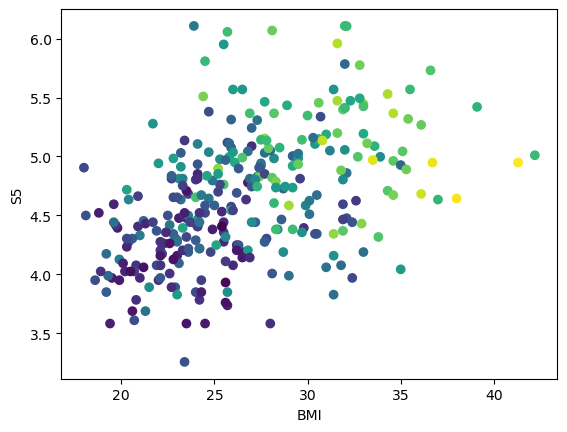

In [1002]:
plt.scatter(x_train.BMI,x_train.S5,c=y_train)
plt.xlabel('BMI')
plt.ylabel('S5')
plt.show()

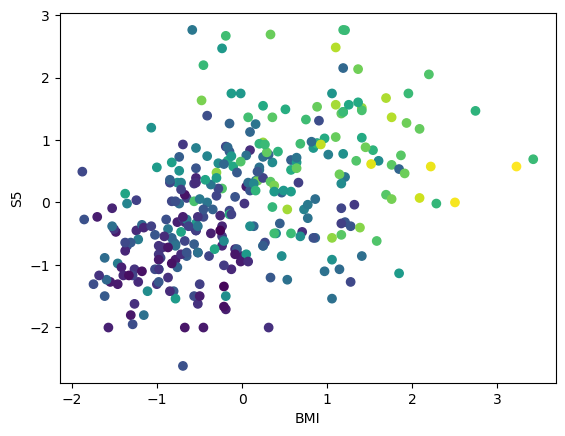

In [1003]:
## 스케일 된 데이터 시각화 ==> scaled_x_train
plt.scatter(scaled_x_train[:,0],scaled_x_train[:,1],c=y_train)
plt.xlabel('BMI')
plt.ylabel('S5')
plt.show()

- 학습진행 <hr>

In [1004]:
# KNN 알고리즘
# 모델 성능 좌우 매개변수 => 하이퍼 파라미터 n_neighbors
# n_neighbors 즉 k 갯수 : 1 ~ 전체 데이터 수
max_k=scaled_x_train.shape[0]

test_scorelist = []
train_scorelist = []
for k in range(1,100):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(scaled_x_train,y_train)
    test_scorelist.append(model.score(scaled_x_test,y_test))
    train_scorelist.append(model.score(scaled_x_train,y_train))
    

In [1005]:
# 학습 및 테스트 데이터에 대한 점수 확인
print(f'train_score: {train_scorelist}')
print(f'test_score: {test_scorelist}')

train_score: [0.9875004828279208, 0.7869275775125055, 0.7170443556596187, 0.6580841454990427, 0.623434705415173, 0.5927439386412017, 0.5782646395298412, 0.5807575706557856, 0.5605657137496012, 0.5672597933100025, 0.5553401647375803, 0.5490823574628774, 0.5471541225749912, 0.5476211723596021, 0.5429457148496553, 0.5360147600682159, 0.5323081117778488, 0.5341106427740515, 0.5280851319829682, 0.5233210807022569, 0.5176036709974099, 0.5172281827805052, 0.5147520005917935, 0.5140554749412591, 0.5157755125612591, 0.513710152475735, 0.5162131234473321, 0.5121459883890629, 0.5103665811605722, 0.5125267279666692, 0.5133810501798362, 0.5110485336549739, 0.5108679681039378, 0.5086225976585667, 0.5088933771289592, 0.5090006425986722, 0.5094426841332822, 0.5122113151936756, 0.5116397794821983, 0.5112710793488362, 0.5074086634684405, 0.5054249078534184, 0.5048922589286797, 0.5040655121037919, 0.5033569258779618, 0.501626169047261, 0.5014049367836679, 0.5030408012991415, 0.501994236527215, 0.50279119

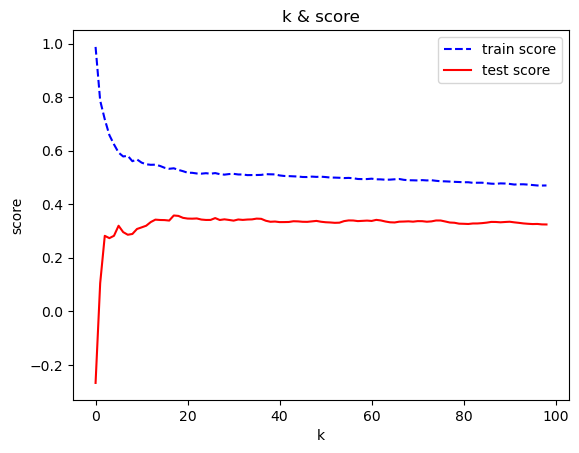

In [1006]:
# k 갯수에 따른 학습옹/테스트용 점수 시각화
plt.plot(train_scorelist,'b--',label='train score')
plt.plot(test_scorelist,'r-',label='test score')
plt.title("k & score")
plt.xlabel('k')
plt.ylabel('score')
plt.legend()
plt.show()

In [1007]:
print('KNN:',model.score(scaled_x_train,y_train))

KNN: 0.46997693421730713


In [1008]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()

In [1009]:
model2.fit(scaled_x_train,y_train)

LinearRegression()

In [1010]:
print('Linear:',model2.score(scaled_x_train,y_train))

Linear: 0.49872068611213805


In [1011]:
from sklearn.svm import SVC
model3=SVC()
model3.fit(scaled_x_train,y_train)

SVC()

In [1012]:
print('SVC:',model3.score(scaled_x_train,y_train))

SVC: 0.06472491909385113
